In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

Reading in the data: we use sample variance of half of the fifty random samples 

In [2]:
df = pd.read_csv('../Data\ICTO_Datasets\ICTO_Giving_2015-2017.csv').sample(frac=0.5)

Explore the data: look at things such as the size of the dataset, the statistics on the data, data types of each column, and the data itself 

In [3]:
df.head()

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
1391042,4023381502905622084,4.023346e+18,123472383866006305,Member,2016-03-20,450.00
864089,4019414481662713408,4.023361e+18,123472388177292833,Member,2015-10-10,25.00
2452739,4023396143677382228,4.019403e+18,123472379554196512,Member,2017-03-01,25.00
2733008,4019411526859431488,4.019420e+18,123472388177488928,Member,2017-06-02,75.00
702961,4018525925457075804,4.023402e+18,123472383748499237,Member,2015-08-17,606.54


In [4]:
df.shape

(1696457, 6)

In [5]:
df.describe()

,DonorAccountId,MemberAccountId,FundId,GiftAmt
count,1.696457e+06,1.568994e+06,1.696457e+06,1.696457e+06
mean,4.034413e+18,4.024536e+18,1.234716e+17,2.174970e+02
std,1.598469e+17,6.828702e+16,2.031949e+12,3.143975e+03
min,3.527723e+18,3.527723e+18,1.234647e+17,4.000000e-02
25%,4.019370e+18,4.022464e+18,1.234724e+17,3.000000e+01
50%,4.022457e+18,4.023342e+18,1.234724e+17,5.500000e+01
75%,4.023354e+18,4.023348e+18,1.234724e+17,1.400000e+02
max,8.924352e+18,8.423685e+18,1.235104e+17,2.500000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696457 entries, 1391042 to 2713253
Data columns (total 6 columns):
DonorAccountId     int64
MemberAccountId    float64
FundId             int64
FundGroup          object
GiftDate           object
GiftAmt            float64
dtypes: float64(2), int64(2), object(2)
memory usage: 90.6+ MB


In [7]:
df.columns

Index(['DonorAccountId', 'MemberAccountId', 'FundId', 'FundGroup', 'GiftDate',
       'GiftAmt'],
      dtype='object')

First step in data cleaning: checking for null values and dropping them

In [8]:
pd.isnull(df).head()

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
1391042,False,False,False,False,False,False
864089,False,False,False,False,False,False
2452739,False,False,False,False,False,False
2733008,False,False,False,False,False,False
702961,False,False,False,False,False,False


In [9]:
df.isnull().sum()

DonorAccountId          0
MemberAccountId    127463
FundId                  0
FundGroup            6594
GiftDate                0
GiftAmt                 0
dtype: int64

Looking at the data there are many null values, we will drop them with this command

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(1568994, 6)

In [12]:
print("Null Values")
print(df.isnull().sum()) # checking again for null values
print()
print("Na Values")
print(df.isna().sum()) # also checking for na values

Null Values
DonorAccountId     0
MemberAccountId    0
FundId             0
FundGroup          0
GiftDate           0
GiftAmt            0
dtype: int64

Na Values
DonorAccountId     0
MemberAccountId    0
FundId             0
FundGroup          0
GiftDate           0
GiftAmt            0
dtype: int64


Second Step: check for outliers in the data
-Outliers are great for training an ML model but if they are to far away from 
the median or mean of the data it can throw of our training process

In [13]:
df.head(10)

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
1391042,4023381502905622084,4.023346e+18,123472383866006305,Member,2016-03-20,450.00
864089,4019414481662713408,4.023361e+18,123472388177292833,Member,2015-10-10,25.00
2452739,4023396143677382228,4.019403e+18,123472379554196512,Member,2017-03-01,25.00
2733008,4019411526859431488,4.019420e+18,123472388177488928,Member,2017-06-02,75.00
702961,4018525925457075804,4.023402e+18,123472383748499237,Member,2015-08-17,606.54
2959356,4018527502548934212,4.019406e+18,123472379570777632,Member,2017-08-14,650.00
2914316,4018521978902224452,4.022456e+18,123471288615530273,Member,2017-08-01,25.00
1465075,4019415923496656464,4.023370e+18,123471297222240032,Member,2016-04-15,20.00
2765061,4023358245708045863,4.023370e+18,123472353750707748,Member,2017-06-10,25.00
3213567,4019360665437281876,4.023382e+18,123471288615593517,Member,2017-11-10,5.00


In [14]:
# print("GiftAmt")
print(df['GiftAmt'].value_counts().head())
print(df['GiftAmt'].value_counts().tail())
# df['GiftAmt'].value_counts()

50.0     290248
100.0    223673
25.0     161022
20.0      74688
30.0      72659
Name: GiftAmt, dtype: int64
155.65     1
33.93      1
1841.00    1
747.61     1
56.46      1
Name: GiftAmt, dtype: int64


In [15]:
# print("GiftDate")
print(df['GiftDate'].value_counts().head())
print(df['GiftDate'].value_counts().tail())
# df['GiftDate'].value_counts()

2015-08-10    10478
2017-10-10    10166
2017-07-10    10063
2017-04-10     9911
2016-10-10     9367
Name: GiftDate, dtype: int64
2015-03-21    28
2016-05-21    26
2016-05-22    25
2017-11-04    25
2016-04-17    24
Name: GiftDate, dtype: int64


In [16]:
# Get the 98th and 2nd percentile as the limits of our outliers
upper_limit = np.percentile(df.GiftAmt.values, 98) 
lower_limit = np.percentile(df.GiftAmt.values, 2) 
# Filter the outliers from the dataframe

df['GiftAmt'].loc[df['GiftAmt']>upper_limit] = upper_limit
df['GiftAmt'].loc[df['GiftAmt']<lower_limit] = lower_limit

C:\Users\craig\Desktop\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


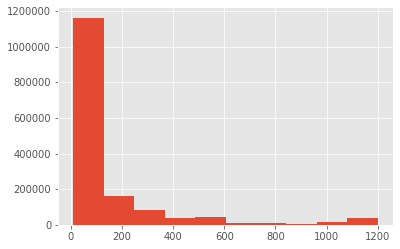

In [17]:
plt.hist(df['GiftAmt'], bins=10, histtype='bar')
# plt.hist(df['GiftDate'],bins=10, histtype='bar')
plt.show()

In [18]:
df['GiftAmt'].mean()

150.00614709170674

In [19]:
df['GiftAmt'].median()

60.0

Create a scatter chart with a line going through the middle that is the mean 

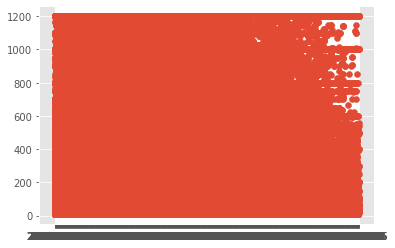

In [20]:
plt.scatter(df['GiftDate'], df['GiftAmt'])
plt.show()

In [21]:
Dates = pd.Series(df['GiftDate'].sample(frac=0.5))
Amount = pd.Series(df['GiftAmt'].sample(frac=0.5))
plt.plot(Dates, Amount, color='red', marker='o')
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

In [22]:
# plt.bar(df['GiftAmt'], df['GiftDate'])
# plt.show()

Third Step: check for duplicates and bad values in the data

In [23]:
sum(df.duplicated()) # duplicates found

8484

In [24]:
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

In [25]:
df.columns

Index(['DonorAccountId', 'MemberAccountId', 'FundId', 'FundGroup', 'GiftDate',
       'GiftAmt'],
      dtype='object')

In [26]:
df['FundGroup'].value_counts().head()

Member          1556973
Paid Staff         3111
Wycliffe USA        338
Volunteer            88
Name: FundGroup, dtype: int64

In [27]:
df['GiftDate'].value_counts().head()

2015-08-10    10427
2017-10-10    10076
2017-07-10     9946
2017-04-10     9792
2016-10-10     9310
Name: GiftDate, dtype: int64

In [28]:
df['GiftAmt'].value_counts().head()

50.0     290248
100.0    223673
25.0     161022
20.0      74688
30.0      72659
Name: GiftAmt, dtype: int64

In [29]:
# Convert the data to string instead of object for data analysis
df['FundGroup'] = df['FundGroup'].astype('str')
df['GiftDate'] = df['GiftDate'].astype('str')

In [30]:
# df = df.drop(['DonorAccountId', 'MemberAccountId'], axis=1)
df.head()

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
1391042,4023381502905622084,4.023346e+18,123472383866006305,Member,2016-03-20,450.00
864089,4019414481662713408,4.023361e+18,123472388177292833,Member,2015-10-10,25.00
2452739,4023396143677382228,4.019403e+18,123472379554196512,Member,2017-03-01,25.00
2733008,4019411526859431488,4.019420e+18,123472388177488928,Member,2017-06-02,75.00
702961,4018525925457075804,4.023402e+18,123472383748499237,Member,2015-08-17,606.54


Fourth Step: Drop Irrelevant Features

In [31]:
df.drop(['DonorAccountId', 'MemberAccountId', 'FundId'], axis=1, inplace=True)

In [32]:
df.head()

,FundGroup,GiftDate,GiftAmt
1391042,Member,2016-03-20,450.00
864089,Member,2015-10-10,25.00
2452739,Member,2017-03-01,25.00
2733008,Member,2017-06-02,75.00
702961,Member,2015-08-17,606.54


Checking from the value counts the data seems to be standardized

Creating an Index column for all of the new data from 0 to last row

In [33]:
# df['Index'] = df.iloc[0]

In [34]:
# df.set_index(df['Index']).head()

In [35]:
# df['Index'] = pd.Series(range(0,df.shape[0]))
# df['Index'] = pd.Series(range(0, len(df['FundId'])))
# df['Index'].head()

In [36]:
# print(df.shape[0])

In [37]:
# df.set_index(df['Index']).head()

In [38]:
# df.head()

Reading out the cleaned dataset into a new csv file

In [39]:
df.to_csv('../Data/ICTO_Datasets/cleaned_ICTO_Giving_2015-2017.csv')